# OUR REPORT

## EDA
> "Write an EDA section in your technical report. Report the results of the initial models and include figures or tables that show the target variable and its relationship with potentially significant predictors."

![Screenshot 2024-12-11 at 12.26.33 PM.png](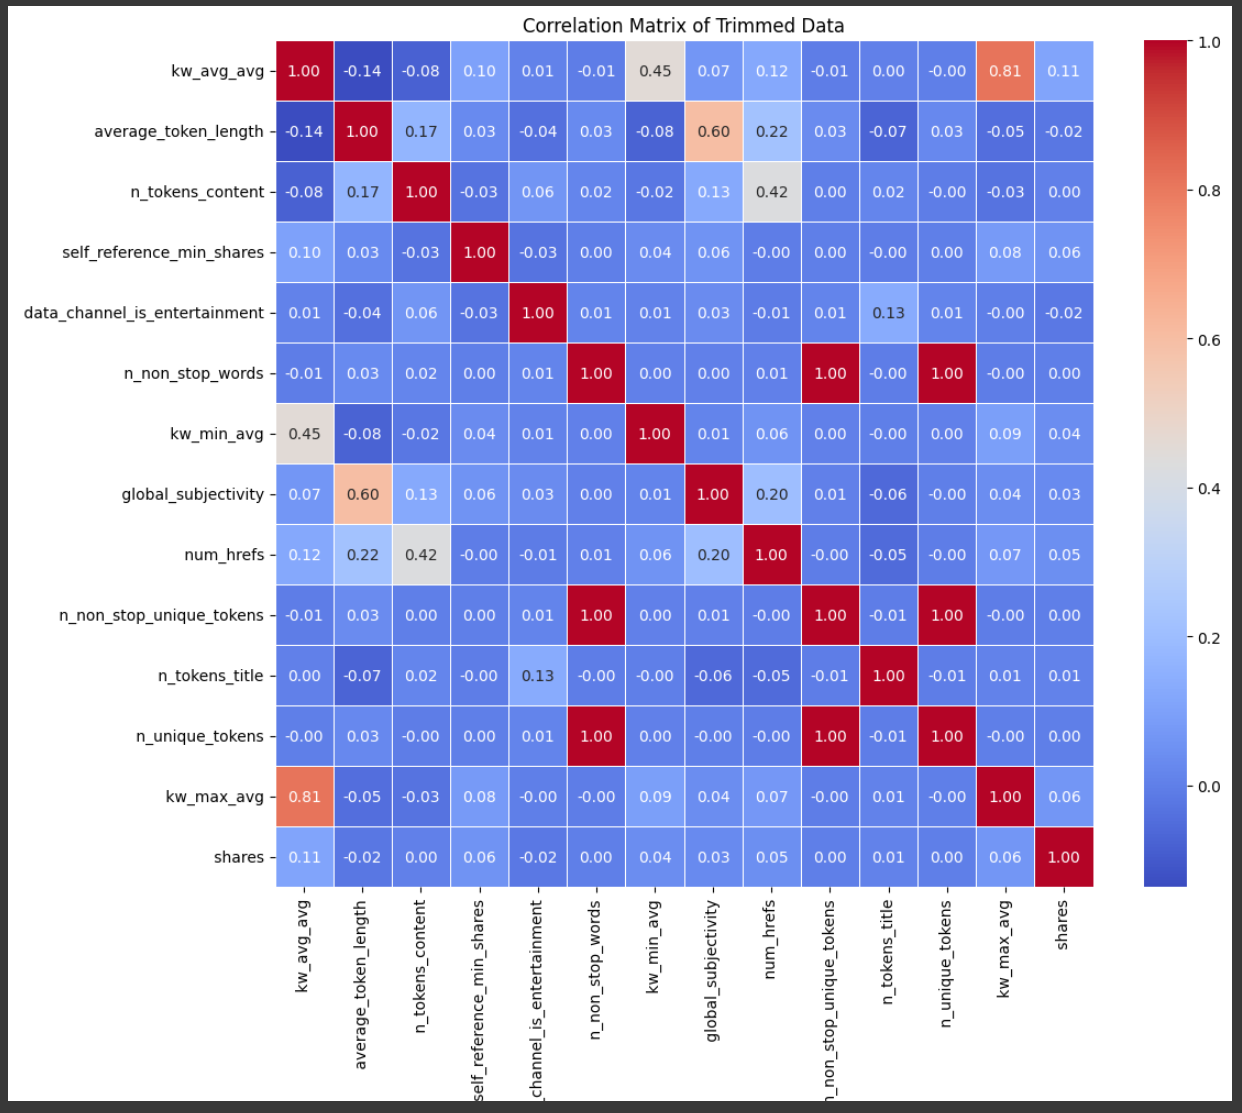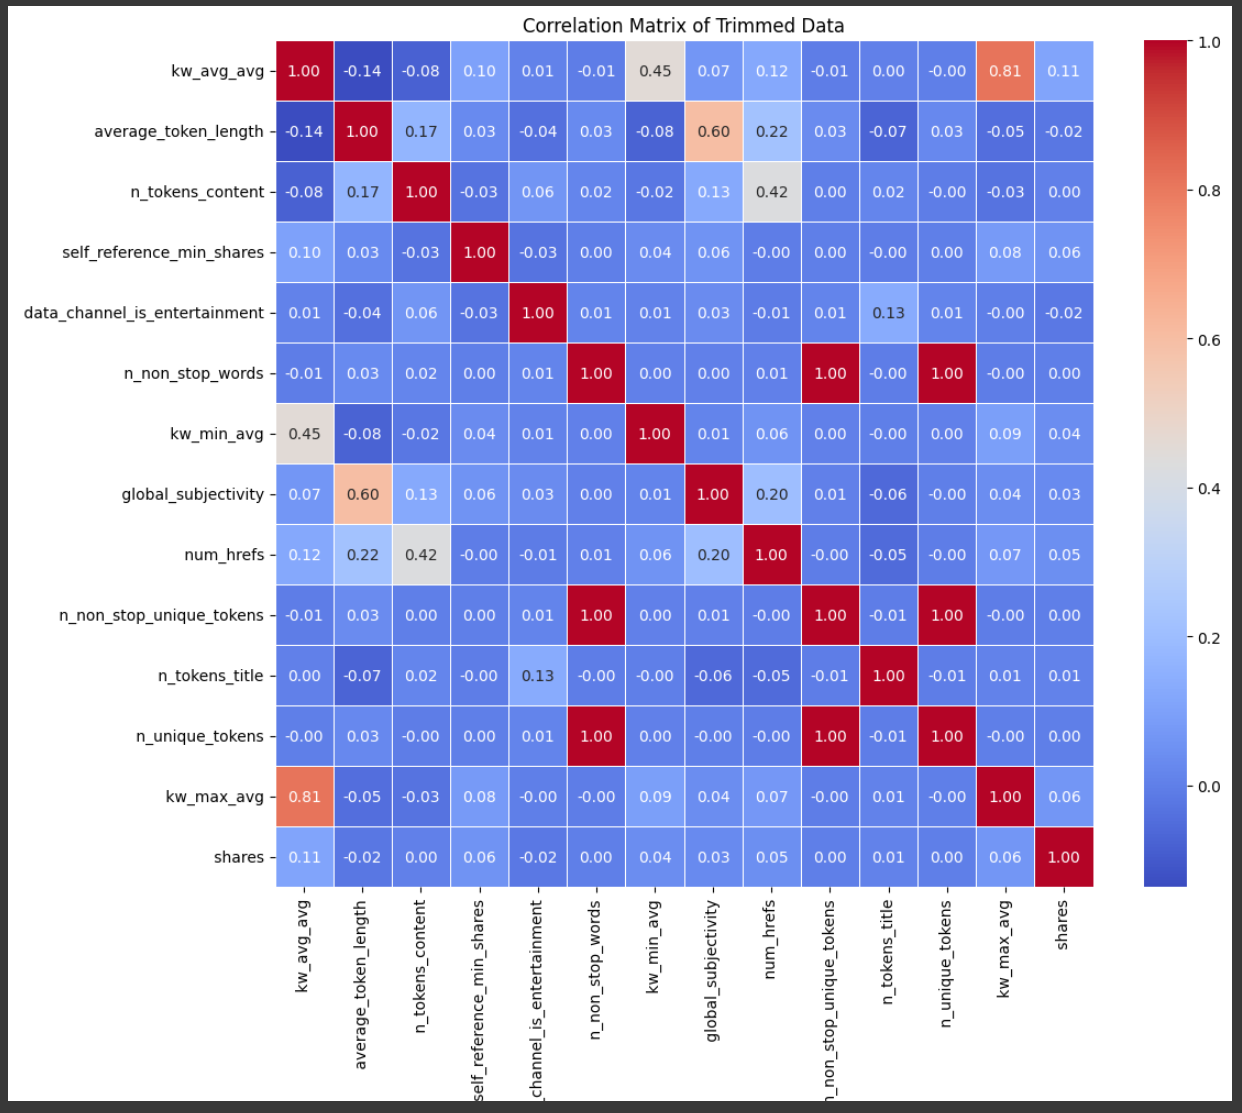)

---


## Linear Regression Modeling
> Write a section in your technical report that reports the out-of-sample performance of the models. Discuss the most significant predictors and evaluate the model?s usefulness for predicting future shares.



---

## Regression Tree Modeling
> Write a section in your technical report that reports the out-of-sample performance of the models. Discuss the models usefulness for predicting future shares.

Out of sample metrics:
- Mean Squared Error: 181678178.1970393
- R-squared: -0.5055557816868557

We made the model using cost complexity analysis, and included a max depth so the model wouldn't run forever. However, because of the complexity of the model, it likely underfit. Because of the difficulty of the data set, a decision tree should be avoided because it lacks the ability to fully caputre the data. This is reflected by the r-squared score, which suggests that our model actually is misguided about accurately reflecting our model. Additionally, the MSE is super high, suggesting that individual predictions are usually very far away from the actual result. Thus, this model isn't very useful.

Out of Sample Metrics for Random Forest:
- Mean Squared Error: 181678178.1970393
- R-squared: -0.5055557816868557

---


## Conclusion!
> Compare each models predictive accuracy on the test set. Choose the
best-performing model as the final predictive model. Write a concluding section in
your technical report that addresses Mashable?s business concerns and presents your
final model along with your confidence in its predictions.

*Josh stuff here*




# EDA
Brought to you by Adam

In [ ]:
%%capture
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_news_popularity = fetch_ucirepo(id=332)

# data (as pandas dataframes)
X = online_news_popularity.data.features
y = online_news_popularity.data.targets

# metadata
print(online_news_popularity.metadata)

# variable information
print(online_news_popularity.variables)


{'uci_id': 332, 'name': 'Online News Popularity', 'repository_url': 'https://archive.ics.uci.edu/dataset/332/online+news+popularity', 'data_url': 'https://archive.ics.uci.edu/static/public/332/data.csv', 'abstract': 'This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 39797, 'num_features': 58, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': [' shares'], 'index_col': ['url'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Thu Feb 15 2024', 'dataset_doi': '10.24432/C5NS3V', 'creators': ['Kelwin Fernandes', 'Pedro Vinagre', 'Paulo Cortez', 'Pedro Sernadela'], 'intro_paper': {'ID': 390, 'type': 'NATIVE', 'title': 'A Proactive Intelligent Decisio

In [ ]:
online_news_popularity.variables

,name,role,type,demographic,description,units,missing_values
0,url,ID,Categorical,None,None,None,no
1,timedelta,Other,Continuous,None,None,None,no
2,n_tokens_title,Feature,Continuous,None,None,None,no
3,n_tokens_content,Feature,Continuous,None,None,None,no
4,n_unique_tokens,Feature,Continuous,None,None,None,no
...,...,...,...,...,...,...,...
56,title_subjectivity,Feature,Continuous,None,None,None,no
57,title_sentiment_polarity,Feature,Continuous,None,None,None,no
58,abs_title_subjectivity,Feature,Continuous,None,None,None,no
59,abs_title_sentiment_polarity,Feature,Continuous,None,None,None,no


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<Axes: ylabel='Frequency'>

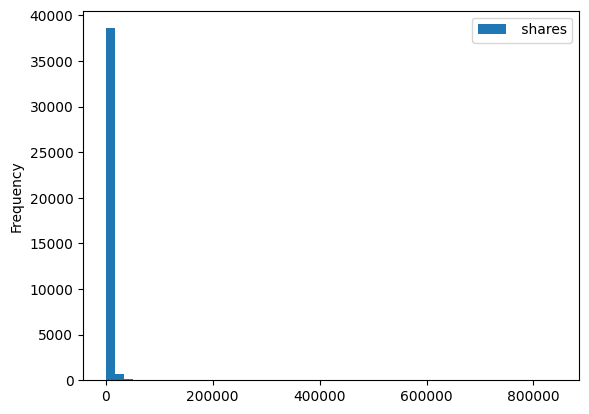

In [ ]:
y.plot(kind = "hist", bins = 50)

<Axes: ylabel='Frequency'>

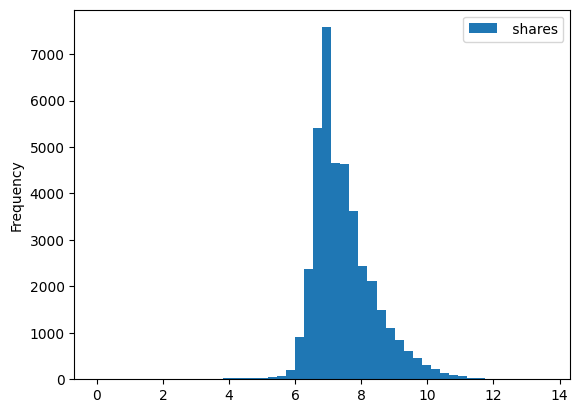

In [ ]:
y_log = np.log(y)
y_log.plot(kind = "hist", bins = 50)

In [ ]:
X

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000


In [ ]:
X.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.358755,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.411428,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000


## Build a stats models

In [ ]:
import statsmodels.api as sm

def create_and_fit_model(X, y):
    """
    Creates and fits a statsmodels OLS regression model.

    Parameters:
    X (pd.DataFrame or np.ndarray): Feature matrix (independent variables).
    y (pd.Series or np.ndarray): Target vector (dependent variable).

    Returns:
    sm.regression.linear_model.RegressionResultsWrapper: Fitted statsmodels model.
    """
    # Add a constant to the model (intercept)
    X_with_const = sm.add_constant(X)

    # Create the OLS model
    model = sm.OLS(y, X_with_const)

    # Fit the model
    fitted_model = model.fit()

    return fitted_model



In [ ]:
X = pd.get_dummies(X, drop_first = True)

In [ ]:
initial_model = create_and_fit_model(X, y)

In [ ]:
initial_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     16.71
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          8.49e-158
Time:                        19:00:00   Log-Likelihood:            -4.2690e+05
No. Observations:               39644   AIC:                         8.539e+05
Df Residuals:                   39587   BIC:                         8.544e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -1.5e+05   5.21e+06     -0.029      0.977   -1.04e+07    1.01e+07
 n_tokens_title                   89.8590     28.671      3.134      0.002      33.662     146.056
 n_tokens_content                  0.5936      0.224      2.656      0.008       0.156       1.032
 n_unique_tokens                3985.3304   1918.563      2.077      0.038     224.901    7745.759
 n_non_stop_words              -1483.5656   5910.913     -0.251      0.802   -1.31e+04    1.01e+04
 n_non_stop_unique_tokens      -1640.5102   1629.463     -1.007      0.314   -4834.297    1553.276
 num_hrefs                        26.5413      6.706      3.958      0.000      13.397      39.686
 num_self_hrefs                  -57.6437     17.818     -3.235      0.001     -92.567     -22.720
 num_imgs                         11.8973      8.942      1.330      0.183      -5.629      29.424
 num_videos                        5.6446     15.751      0.358      0.720     -25.227      36.516
 average_token_length           -586.7288    242.856     -2.416      0.016   -1062.732    -110.725
 num_keywords                     49.4938     37.137      1.333      0.183     -23.295     122.282
 data_channel_is_lifestyle     -1050.0275    394.651     -2.661      0.008   -1823.553    -276.502
 data_channel_is_entertainment -1180.4984    255.195     -4.626      0.000   -1680.687    -680.310
 data_channel_is_bus            -802.3200    382.716     -2.096      0.036   -1552.452     -52.188
 data_channel_is_socmed         -602.9409    372.377     -1.619      0.105   -1332.809     126.927
 data_channel_is_tech           -550.9452    371.426     -1.483      0.138   -1278.948     177.058
 data_channel_is_world          -483.0776    376.363     -1.284      0.199   -1220.758     254.603
 kw_min_min                        2.2088      1.623      1.361      0.174      -0.973       5.391
 kw_max_min                        0.0872      0.050      1.739      0.082      -0.011       0.185
 kw_avg_min                       -0.3468      0.308     -1.127      0.260      -0.950       0.257
 kw_min_max                       -0.0021      0.001     -1.761      0.078      -0.004       0.000
 kw_max_max                       -0.0005      0.001     -0.890      0.373      -0.002       0.001
 kw_avg_max                       -0.0007      0.001     -0.867      0.386      -0.002       0.001
 kw_min_avg                       -0.3659      0.076     -4.836      0.000      -0.514      -0.218
 kw_max_avg                       -0.2026      0.025     -8.010      0.000      -0.252      -0.153
 kw_avg_avg                        1.6625      0.144     11.558      0.000       1.381       1.944
 self_reference_min_shares         0.0262      0.008      3.476      0.001       0.011       0.041
 self_referenc

In [ ]:
import statsmodels.api as sm

def refine_model(model, X, y, p_value_threshold=0.05):
    """
    Refines a statsmodels OLS model by removing features with p-values greater than the threshold.

    Parameters:
    model (sm.regression.linear_model.RegressionResultsWrapper): Initial fitted statsmodels model.
    X (pd.DataFrame): Original feature matrix (independent variables).
    y (pd.Series or np.ndarray): Target vector (dependent variable).
    p_value_threshold (float): P-value threshold for feature inclusion. Default is 0.05.

    Returns:
    sm.regression.linear_model.RegressionResultsWrapper: Refined fitted statsmodels model.
    """
    # Add a constant to the feature matrix
    X_with_const = sm.add_constant(X)

    # Fit and refine the model iteratively
    while True:
        # Get the p-values from the current model
        p_values = model.pvalues

        # Exclude the intercept from removal
        p_values = p_values.drop('const', errors='ignore')

        # Find features with p-values greater than the threshold
        features_to_remove = p_values[p_values > p_value_threshold].index

        if features_to_remove.empty:
            # Stop if no features exceed the threshold
            break

        # Drop the features with high p-values from the dataset
        X_with_const = X_with_const.drop(columns=features_to_remove)

        # Refit the model with the reduced set of features
        model = sm.OLS(y, X_with_const).fit()

    return model


In [ ]:
adj_model = refine_model(initial_model, X, y, 0.05)

In [ ]:
adj_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     89.20
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          2.74e-165
Time:                        19:00:01   Log-Likelihood:            -4.2697e+05
No. Observations:               39644   AIC:                         8.540e+05
Df Residuals:                   39634   BIC:                         8.540e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1095.0250    508.486     -2.153      0.031   -2091.670     -98.380
 n_tokens_title                   70.7767     27.687      2.556      0.011      16.509     125.045
 num_hrefs                        32.7149      5.334      6.134      0.000      22.261      43.169
 average_token_length           -443.8782     90.693     -4.894      0.000    -621.638    -266.118
 data_channel_is_entertainment  -634.1518    153.098     -4.142      0.000    -934.227    -334.077
 kw_min_avg                       -0.4863      0.067     -7.221      0.000      -0.618      -0.354
 kw_max_avg                       -0.1959      0.019    -10.048      0.000      -0.234      -0.158
 kw_avg_avg                        1.7679      0.103     17.133      0.000       1.566       1.970
 self_reference_min_shares         0.0262      0.003      8.886      0.000       0.020       0.032
 global_subjectivity            3457.4940    638.869      5.412      0.000    2205.295    4709.693
==============================================================================
Omnibus:                   108721.527   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5845590993.464
Skew:                          34.467   Prob(JB):                         0.00
Kurtosis:                    1882.920   Cond. No.                     2.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
adj_model.params.index

Index(['const', ' n_tokens_title', ' num_hrefs', ' average_token_length',
       ' data_channel_is_entertainment', ' kw_min_avg', ' kw_max_avg',
       ' kw_avg_avg', ' self_reference_min_shares', ' global_subjectivity'],
      dtype='object')

# Regression tree anaylsis

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
rf_tree = RandomForestRegressor(max_leaf_nodes=20)
d_tree = DecisionTreeRegressor(max_leaf_nodes=50)

In [ ]:
d_tree.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=50)

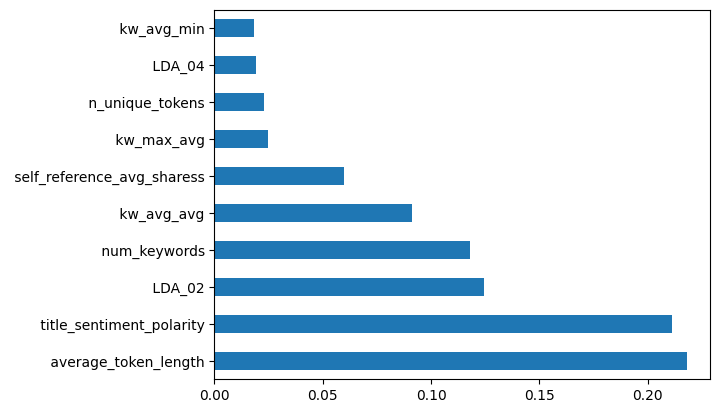

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'd_tree' and 'X' are defined from the previous code
feature_importances = pd.Series(d_tree.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
d_tree.score(X, y)

0.5758315301742647

In [ ]:
feature_importances.head(5).index

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens'],
      dtype='object')

# Part 4 of EDA

In [ ]:
#Our significant Feature Choice
sig_features = list(set([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens']).union([' n_tokens_title', ' num_hrefs', ' average_token_length',
       ' data_channel_is_entertainment', ' kw_min_avg', ' kw_max_avg',
       ' kw_avg_avg', ' self_reference_min_shares', ' global_subjectivity']))

# for i in range(0, len(sig_features)):
#   sig_features[i] = sig_features[i].replace(" ", "")


In [ ]:
sig_features

[' kw_avg_avg',
 ' average_token_length',
 ' n_tokens_content',
 ' self_reference_min_shares',
 ' data_channel_is_entertainment',
 ' n_non_stop_words',
 ' kw_min_avg',
 ' global_subjectivity',
 ' num_hrefs',
 ' n_non_stop_unique_tokens',
 ' n_tokens_title',
 ' n_unique_tokens',
 ' kw_max_avg']

In [ ]:
combined_data = pd.concat([X, y], axis=1)

In [ ]:
combined_data

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [ ]:
sig_features.append(" shares")
sig_features

[' kw_avg_avg',
 ' average_token_length',
 ' n_tokens_content',
 ' self_reference_min_shares',
 ' data_channel_is_entertainment',
 ' n_non_stop_words',
 ' kw_min_avg',
 ' global_subjectivity',
 ' num_hrefs',
 ' n_non_stop_unique_tokens',
 ' n_tokens_title',
 ' n_unique_tokens',
 ' kw_max_avg',
 ' shares']

In [ ]:
combined_data.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' gl

In [ ]:
trimmed_data = combined_data[sig_features]

In [ ]:
trimmed_data

,kw_avg_avg,average_token_length,n_tokens_content,self_reference_min_shares,data_channel_is_entertainment,n_non_stop_words,kw_min_avg,global_subjectivity,num_hrefs,n_non_stop_unique_tokens,n_tokens_title,n_unique_tokens,kw_max_avg,shares
0,0.000000,4.680365,219.0,496.0,1.0,1.0,0.000000,0.521617,4.0,0.815385,12.0,0.663594,0.000000,593
1,0.000000,4.913725,255.0,0.0,0.0,1.0,0.000000,0.341246,3.0,0.791946,9.0,0.604743,0.000000,711
2,0.000000,4.393365,211.0,918.0,0.0,1.0,0.000000,0.702222,3.0,0.663866,9.0,0.575130,0.000000,1500
3,0.000000,4.404896,531.0,0.0,1.0,1.0,0.000000,0.429850,9.0,0.665635,9.0,0.503788,0.000000,1200
4,0.000000,4.682836,1072.0,545.0,0.0,1.0,0.000000,0.513502,19.0,0.540890,13.0,0.415646,0.000000,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,3031.115764,4.523121,346.0,11400.0,0.0,1.0,2514.742857,0.482679,9.0,0.684783,11.0,0.529052,4004.342857,1800
39640,3411.660830,4.405488,328.0,2100.0,0.0,1.0,1664.267857,0.564374,9.0,0.885057,12.0,0.696296,5470.168651,1900
39641,4206.439195,5.076923,442.0,1400.0,0.0,1.0,1753.882353,0.510296,24.0,0.644128,10.0,0.516355,6880.687034,1900
39642,1777.895883,4.975073,682.0,452.0,0.0,1.0,0.000000,0.358578,10.0,0.692661,6.0,0.539493,3384.316871,1100


<Axes: >

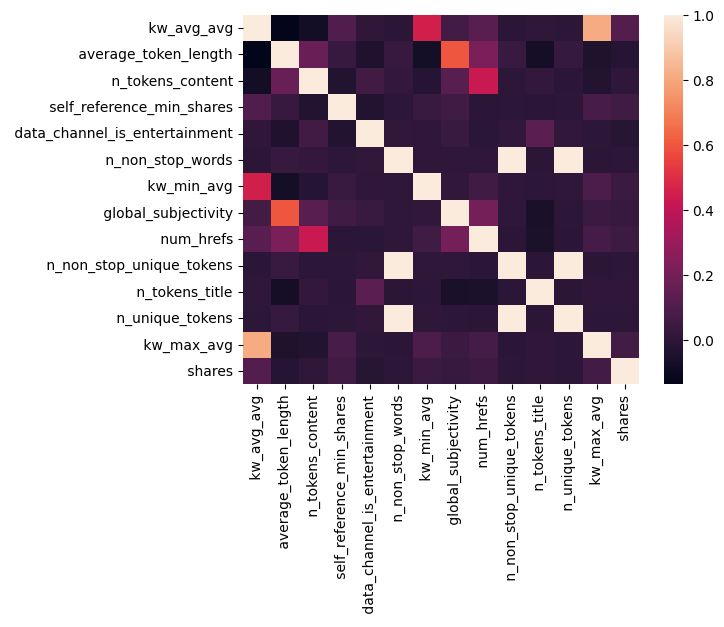

In [ ]:
sns.heatmap(trimmed_data.corr())

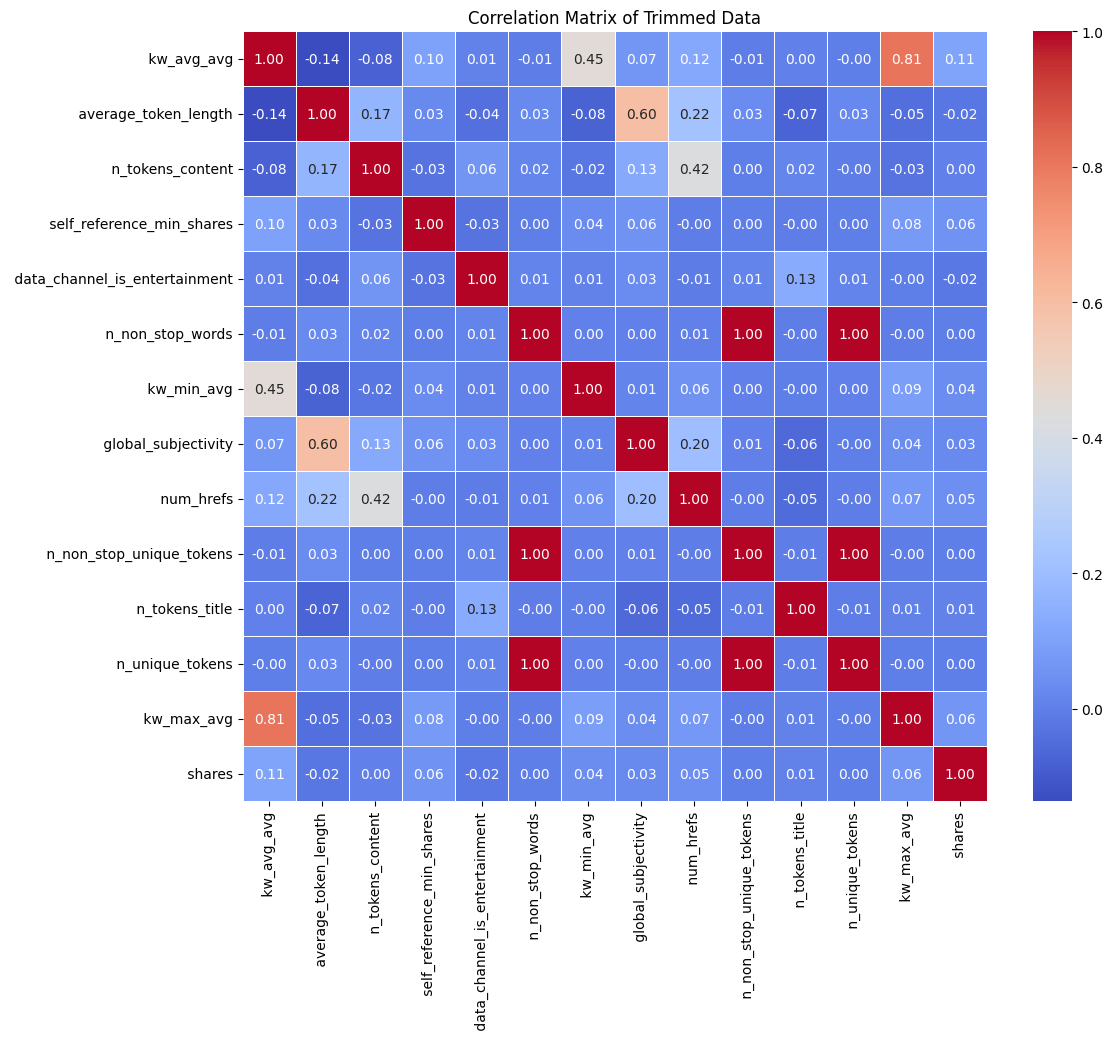

In [ ]:
plt.figure(figsize=(12, 10)) # Adjust the figure size for better readability
sns.heatmap(trimmed_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Trimmed Data') # Add a title to the plot
plt.show()

- Wrap up EDA

# Linear Regression Modeling

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are defined from the previous code
X_train, X_test, y_train, y_test = train_test_split(trimmed_data, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

In [ ]:
# prompt: 2. Explore transformations of the target and other variables. by creating a function to do this

import pandas as pd
import numpy as np

def explore_transformations(df, column_name, transformations):
    """
    Explores different transformations of a specified column in a DataFrame.

    Args:
        df: The input DataFrame.
        column_name: The name of the column to transform.
        transformations: A dictionary where keys are transformation names and
                         values are functions that perform the transformation.

    Returns:
        A DataFrame with the original column and its transformed versions.
    """

    transformed_df = pd.DataFrame()
    transformed_df[column_name] = df[column_name]

    for transformation_name, transformation_func in transformations.items():
        try:
            transformed_df[transformation_name] = transformation_func(df[column_name])
        except (ValueError, TypeError) as e:
            print(f"Error applying transformation '{transformation_name}' to '{column_name}': {e}")
            transformed_df[transformation_name] = np.nan  # Or handle the error differently

    return transformed_df

# Example Usage (assuming 'y' is your target variable and 'X' has other features):
transformations_to_apply = {
    'log_transform': np.log1p,  # Log transformation (add 1 to avoid log(0))
    'sqrt_transform': np.sqrt,    # Square root transformation
    'inverse': lambda x: 1/x, # Reciprocal transformation
    # Add other transformations as needed
}




In [ ]:
transformed_y = explore_transformations(pd.DataFrame(y), ' shares', transformations_to_apply)
transformed_y.head()

,shares,log_transform,sqrt_transform,inverse
0,593,6.386879,24.351591,0.001686
1,711,6.568078,26.664583,0.001406
2,1500,7.313887,38.729833,0.000667
3,1200,7.090910,34.641016,0.000833
4,505,6.226537,22.472205,0.001980


In [ ]:
transformed_n_tokens = explore_transformations(X, ' n_tokens_content', transformations_to_apply)
transformed_n_tokens.head()

,n_tokens_content,log_transform,sqrt_transform,inverse
0,219.0,5.393628,14.798649,0.004566
1,255.0,5.545177,15.968719,0.003922
2,211.0,5.356586,14.525839,0.004739
3,531.0,6.276643,23.043437,0.001883
4,1072.0,6.978214,32.741411,0.000933


In [ ]:
higher_order = X.copy()

In [ ]:
for columns in higher_order.columns:
  df = explore_transformations(higher_order, ' n_tokens_content', transformations_to_apply)

  for column in df.columns[1:]:
    higher_order[columns + "_" + column] = df[column]


In [ ]:
higher_order

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,title_subjectivity_inverse,title_sentiment_polarity_log_transform,title_sentiment_polarity_sqrt_transform,title_sentiment_polarity_inverse,abs_title_subjectivity_log_transform,abs_title_subjectivity_sqrt_transform,abs_title_subjectivity_inverse,abs_title_sentiment_polarity_log_transform,abs_title_sentiment_polarity_sqrt_transform,abs_title_sentiment_polarity_inverse
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.004566,5.393628,14.798649,0.004566,5.393628,14.798649,0.004566,5.393628,14.798649,0.004566
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.003922,5.545177,15.968719,0.003922,5.545177,15.968719,0.003922,5.545177,15.968719,0.003922
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.004739,5.356586,14.525839,0.004739,5.356586,14.525839,0.004739,5.356586,14.525839,0.004739
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.001883,6.276643,23.043437,0.001883,6.276643,23.043437,0.001883,6.276643,23.043437,0.001883
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.000933,6.978214,32.741411,0.000933,6.978214,32.741411,0.000933,6.978214,32.741411,0.000933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.002890,5.849325,18.601075,0.002890,5.849325,18.601075,0.002890,5.849325,18.601075,0.002890
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.003049,5.796058,18.110770,0.003049,5.796058,18.110770,0.003049,5.796058,18.110770,0.003049
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.002262,6.093570,21.023796,0.002262,6.093570,21.023796,0.002262,6.093570,21.023796,0.002262
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.001466,6.526495,26.115130,0.001466,6.526495,26.115130,0.001466,6.526495,26.115130,0.001466


In [ ]:
for i in range(len(X.columns)):
  for j in range(i + 1, len(X.columns)):
      higher_order[f"{X.columns[i]}_{X.columns[j]}"] = higher_order[X.columns[i]] * higher_order[X.columns[j]]
higher_order.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_negative_polarity_ title_subjectivity,max_negative_polarity_ title_sentiment_polarity,max_negative_polarity_ abs_title_subjectivity,max_negative_polarity_ abs_title_sentiment_polarity,title_subjectivity_ title_sentiment_polarity,title_subjectivity_ abs_title_subjectivity,title_subjectivity_ abs_title_sentiment_polarity,title_sentiment_polarity_ abs_title_subjectivity,title_sentiment_polarity_ abs_title_sentiment_polarity,abs_title_subjectivity_ abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,-0.100000,0.037500,-0.000000,-0.037500,-0.093750,0.000000,0.093750,-0.000000,-0.035156,0.000000
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,-0.000000,-0.000000,-0.050000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,-0.000000,-0.000000,-0.066667,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,-0.000000,-0.000000,-0.083333,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,-0.022727,-0.006818,-0.002273,-0.006818,0.061983,0.020661,0.061983,0.006198,0.018595,0.006198


In [ ]:
higher_order = higher_order.fillna(0)
higher_order = higher_order.replace([np.inf, -np.inf], 0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(higher_order, y, test_size=0.2, random_state=42)

In [ ]:
model2 = create_and_fit_model(X_train, y_train)

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     3.588
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          6.13e-240
Time:                        19:01:12   Log-Likelihood:            -3.4074e+05
No. Observations:               31715   AIC:                         6.833e+05
Df Residuals:                   30819   BIC:                         6.908e+05
Df Model:                         895                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                        -2702.8490   5938.960     -0.455      0.649   -1.43e+04    8937.756
 n_tokens_title                                                360.2383    305.727      1.178      0.239    -238.999     959.475
 n_tokens_content                                                5.3480     36.598      0.146      0.884     -66.385      77.081
 n_unique_tokens                                             -8318.8292    1.7e+04     -0.490      0.624   -4.16e+04    2.49e+04
 n_non_stop_words                                            -5006.6614   8546.407     -0.586      0.558   -2.18e+04    1.17e+04
 n_non_stop_unique_tokens                                     1.128e+04   1.42e+04      0.794      0.427   -1.66e+04    3.91e+04
 num_hrefs                                                     153.0386     72.674      2.106      0.035      10.596     295.482
 num_self_hrefs                                               -435.8431    248.778     -1.752      0.080    -923.458      51.772
 num_imgs                                                      120.5760    106.268      1.135      0.257     -87.714     328.866
 num_videos                                                   -103.7075    287.704     -0.360      0.719    -667.620     460.205
 average_token_length                                          762.1135   1384.672      0.550      0.582   -1951.900    3476.127
 num_keywords                                                 -145.9773    415.816     -0.351      0.726    -960.994     669.039
 data_channel_is_lifestyle                                    1660.3463   4442.974      0.374      0.709   -7048.065    1.04e+04
 data_channel_is_entertainment                               -1652.1924   2650.979     -0.623      0.533   -6848.220    3543.835
 data_channel_is_bus                                           846.2701   4403.294      0.192      0.848   -7784.366    9476.906
 data_channel_is_socmed                                       2190.1954   4641.816      0.472      0.637   -6907.954    1.13e+04
 data_channel_is_tech                                         3767.2845   4087.637      0.922      0.357   -4244.651    1.18e+04
 data_channel_is_world                                        2411.3573   3909.328      0.617      0.537   -5251.086    1.01e+04
 kw_min_min                                                     29.0241     20.964      1.384      0.166     -12.067      70.115
 kw_max_min                                                      2.2160      1.309      1.692      0.091      -0.351       4.783
 kw_avg_min                                                    -15.5532      6.883     -2.260      0.024     -29.043

In [ ]:
refinedModel2 = refine_model(model2, higher_order, y)

In [ ]:
refinedModel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     35.83
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          7.05e-204
Time:                        19:01:18   Log-Likelihood:            -4.2683e+05
No. Observations:               39644   AIC:                         8.537e+05
Df Residuals:                   39613   BIC:                         8.540e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   2160.2432    180.643     11.959      0.000    1806.179    2514.307
 n_tokens_title_ data_channel_is_bus                    -118.0231     29.386     -4.016      0.000    -175.621     -60.425
 n_tokens_title_ max_negative_polarity                  -318.3692     68.167     -4.670      0.000    -451.979    -184.759
 n_tokens_content_ data_channel_is_tech                    1.2267      0.262      4.681      0.000       0.713       1.740
 n_tokens_content_ min_positive_polarity                  -6.0484      1.936     -3.124      0.002      -9.843      -2.253
 num_hrefs_ weekday_is_wednesday                          41.6082     10.359      4.016      0.000      21.304      61.913
 num_hrefs_ abs_title_sentiment_polarity                  73.4013     14.171      5.180      0.000      45.625     101.178
 num_self_hrefs_ kw_avg_min                                0.1783      0.025      7.033      0.000       0.129       0.228
 num_self_hrefs_ min_negative_polarity                   132.7853     25.433      5.221      0.000      82.936     182.635
 num_imgs_ data_channel_is_tech                         -166.5880     36.231     -4.598      0.000    -237.602     -95.574
 num_imgs_ LDA_04                                        173.4118     39.150      4.429      0.000      96.677     250.147
 num_videos_ LDA_04                                      390.5124    108.642      3.594      0.000     177.571     603.454
 average_token_length_ title_sentiment_polarity         -346.7326    113.455     -3.056      0.002    -569.107    -124.359
 data_channel_is_bus_ LDA_03                            6846.8370   1560.143      4.389      0.000    3788.919    9904.755
 data_channel_is_bus_ min_negative_polarity            -1913.3307    522.425     -3.662      0.000   -2937.296    -889.366
 kw_min_min_ weekday_is_saturday                          13.6221      2.440      5.582      0.000       8.839      18.405
 kw_min_min_ weekday_is_sunday                            -6.5393      2.213     -2.954      0.003     -10.878      -2.201
 kw_min_min_ is_weekend                                    7.0828      1.519      4.663      0.000       4.106      10.060
 kw_max_min_ kw_avg_min                                -9.366e-05    1.9e-05     -4.922      0.000      -0.000   -5.64e-05
 kw_avg_min_ kw_max_avg                                 9.968e-05   1.97e-05      5.057      0.000     6.1e-05       0.000
 kw_avg_min_ weekday_is_tuesday                           -1.0326      0.258     -4.006      0.000      -1.538      -0.527
 kw_avg_min_ weekday_is_wednesday                         -1.1798      0.243     -4.848      0.000      -1.657      -0.703
 kw_max_

# LASSO REGRESSION

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(higher_order, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

# param_grid = {'alpha': [0.01, 0.1, 1]}
# lasso = GridSearchCV(Lasso(random_state=42), param_grid, scoring='neg_mean_squared_error', cv=2)
# lasso.fit(X_train, y_train)

""" The Best alpha value was 0.1""""

In [ ]:
from sklearn.metrics import mean_squared_error

# best_alpha = lasso.best_params_['alpha']
# print("Best Alpha from GridSearchCV:", best_alpha)

lasso_best = Lasso(alpha=0.1, random_state=42)
lasso_best.fit(X_train, y_train)

y_best_pred = lasso_best.predict(X_test)
best_mse = mean_squared_error(y_test, y_best_pred)
print("Mean Squared Error with Best Alpha:", best_mse)
print("Best Lasso Coefficients:", lasso_best.coef_)

Mean Squared Error with Best Alpha: 122819700.34680772
Best Lasso Coefficients: [ 3.32102701e+02 -9.52886813e-01 -8.92406021e+00 ... -6.11348082e+03
 -1.67041004e+03  7.07481405e+03]


In [ ]:
y_best_pred = lasso_best.predict(X_train)
best_mse = mean_squared_error(y_best_pred, y_train)
r2_score = lasso_best.score(X_train, y_train)
print("(In sample) R-squared:", r2_score)
print("(In sample) Mean Squared Error with Best Alpha:", best_mse)

# Regression Tree

In [ ]:
regression_tree = DecisionTreeRegressor(random_state=42, max_depth=8, ccp_alpha=.043)
regression_tree.fit(X_train, y_train)

y_pred = regression_tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 181678178.1970393
R-squared: -0.5055557816868557


In [ ]:
regression_forest = RandomForestRegressor(n_estimators = 20, random_state=42, max_depth=8, ccp_alpha=.043, n_jobs = -1)
regression_forest.fit(X_train, y_train)

y_pred = regression_forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 116258709.44739127
R-squared: 0.036571293718396514


In [ ]:
def calculate_out_of_sample_r_squared(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(r2)

In [ ]:
print("Linear regression: ", end="")
calculate_out_of_sample_r_squared(model2, X_test, y_test)
print("Lineaer regression with LASSO regression: ", end="")
calculate_out_of_sample_r_squared(lasso_best, X_test, y_test)
print("Linear regression with Stepwise evaluation: ", end="")
calculate_out_of_sample_r_squared(refinedModel2, X_test, y_test)
print("Regression Tree model: ", end="")
calculate_out_of_sample_r_squared(regression_tree, X_test, y_test)
print("Random Forest model: ", end="")
calculate_out_of_sample_r_squared(regression_forest, X_test, y_test)

Linear regression: 

ValueError: shapes (7929,1885) and (1886,) not aligned: 1885 (dim 1) != 1886 (dim 0)

# OUR REPORT
- Its at the top
```
`# This is formatted as code`
```

